In [18]:
import os 

import numpy as np 
from scipy.io import loadmat
import pickle as pkl 


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def sd_rom(signal):
    out = np.copy(signal)
    length = out.shape[0]
    for i in range(2,length-2):
        w = [out[i-2], out[i-1], out[i+1], out[i+2]]
        r = w
        r.sort()
        u = (r[0] + r[1]) / 2
        d = []
        for j in range(4):
            if out[i] <= u:
                d.append(r[j] - signal[i])
            else:
                d.append(out[i] - r[3-j])
        if d[0] > 5 or d[1] > 10:
            out[i] = u
    return out
        

In [72]:
signal = np.asarray([0, 0, 1, 1, 100, 2, 2])
clean = sd_rom(signal)
print (clean)

[98, 98, 99, 99]
[0 0 1 1 1 2 2]


In [10]:
noisy_data_dir  = '../../../datasets/Data_27012021_noisy/real/'
noisy_mats = os.listdir(noisy_data_dir)
noisy_mats.sort()

print (noisy_mats)

['OFVC4kW_LM10Hz_paliers_0to120PercTnom_Data.mat', 'OFVC4kW_LM20Hz_TorqueSteps_20190419_Data.mat', 'OFVC4kW_LM30Hz_paliers_0to120PercTnom_Data.mat', 'OFVC4kW_LM45Hz_TorqueSteps_20190419_Data.mat', 'OFVC4kW_LM50Hz_paliers_0to120PercTnom_Data.mat', 'OFVC4kW_LM60Hz_TorqueSteps_20190419_Data.mat', 'OFVC4kW_LM68Hz_paliers_0to120PercTnom_Data.mat', 'OFVC4kW_NoLM_SpeedVariations2_20190419_Data.mat', 'OFVC4kW_NoLM_SpeedVariations_20190419_Data.mat', 'OFVC4kW_NoLM_paliers_0to100Hz_Data.mat']


In [11]:
noisy_mat = loadmat(os.path.join(noisy_data_dir, noisy_mats[0]))
print (noisy_mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'time', 'noisy_current_d', 'noisy_current_q', 'noisy_voltage_d', 'noisy_voltage_q', 'noisy_speed', 'noisy_torque', 'speed', 'torque'])


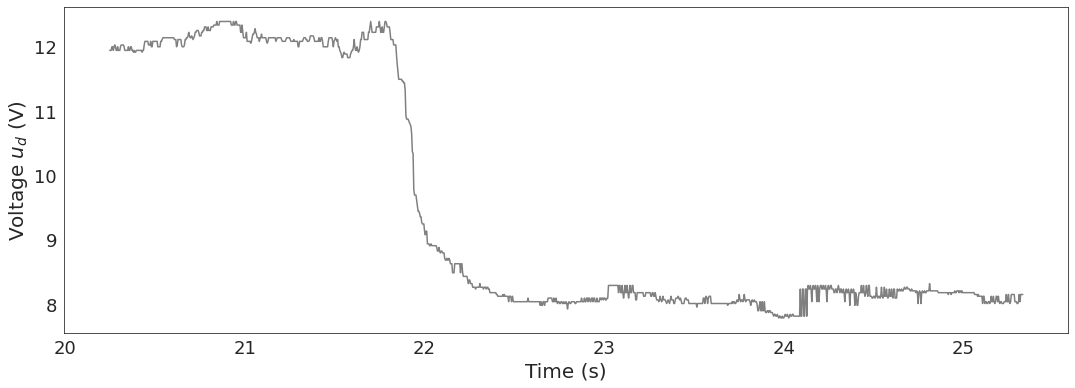

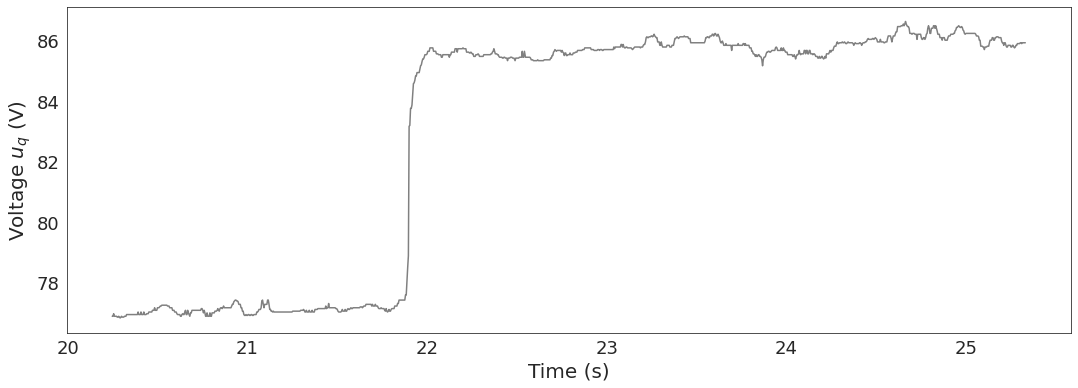

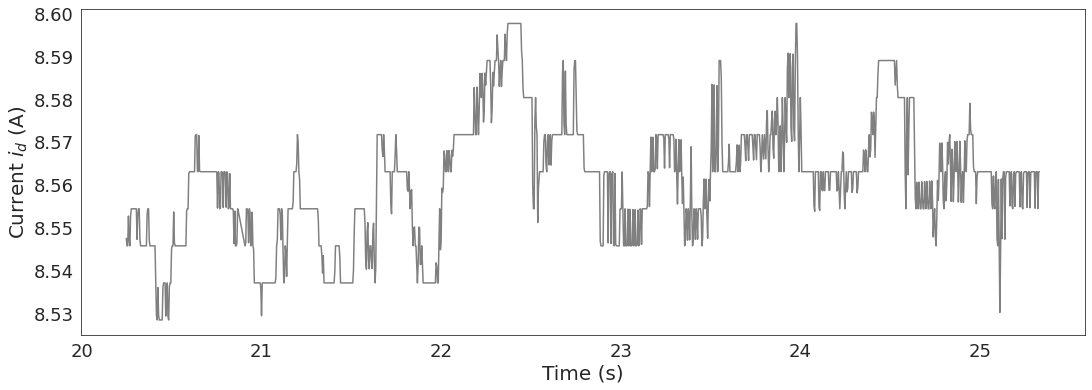

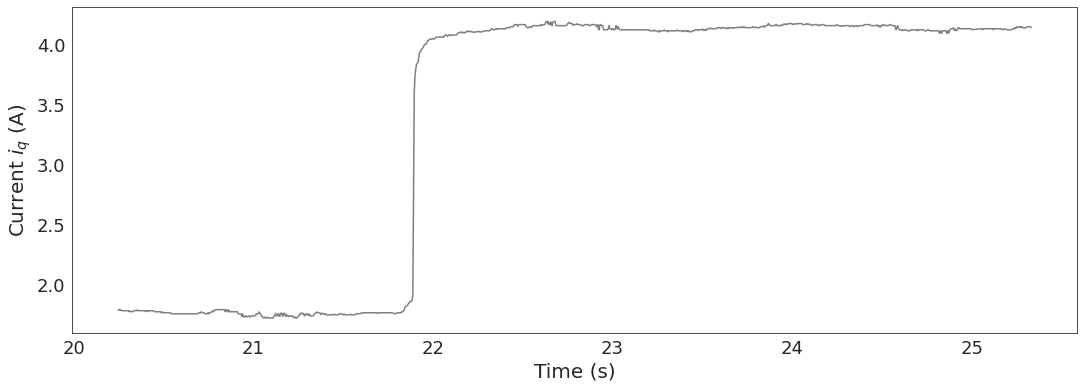

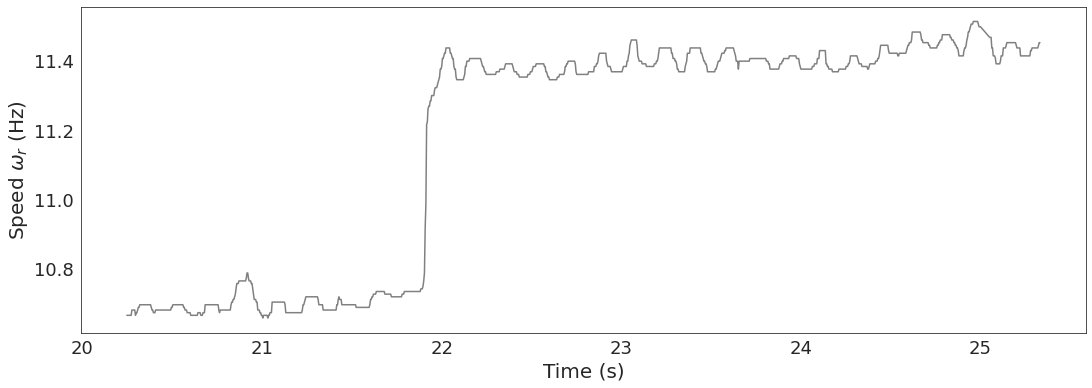

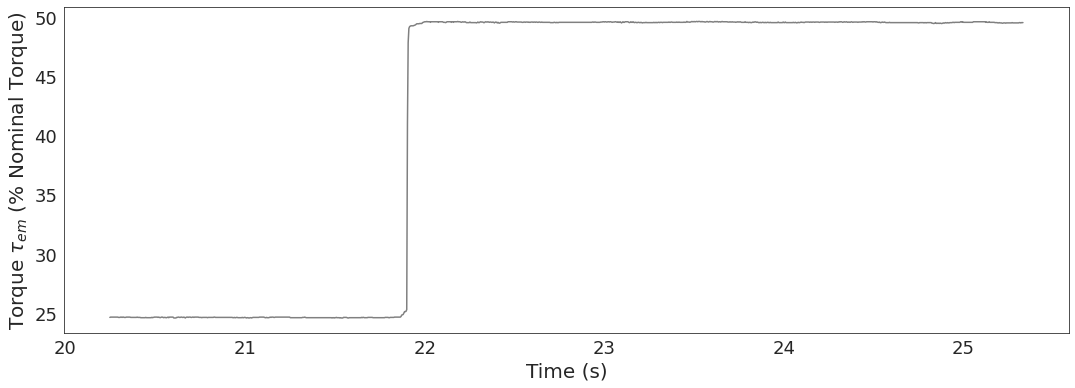

In [38]:
# Plot raw data
st = 20 * 250
et = 25 * 250
sns.set_style("white")
fig = plt.figure(figsize=(18,6))
plt.plot(noisy_mat['time'][0][st:et], noisy_mat['noisy_voltage_d'][0][st:et], color='gray')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel(r'Voltage $u_d$ (V)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('noisy_ud.pdf', bbox_inches="tight", dpi=300, transparent=True)

fig = plt.figure(figsize=(18,6))
plt.plot(noisy_mat['time'][0][st:et], noisy_mat['noisy_voltage_q'][0][st:et], color='gray')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel(r'Voltage $u_q$ (V)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('noisy_uq.pdf', bbox_inches="tight", dpi=300, transparent=True)

fig = plt.figure(figsize=(18,6))
plt.plot(noisy_mat['time'][0][st:et], noisy_mat['noisy_current_d'][0][st:et], color='gray')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel(r'Current $i_d$ (A)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('noisy_id.pdf', bbox_inches="tight", dpi=300, transparent=True)

fig = plt.figure(figsize=(18,6))
plt.plot(noisy_mat['time'][0][st:et], noisy_mat['noisy_current_q'][0][st:et], color='gray')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel(r'Current $i_q$ (A)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('noisy_iq.pdf', bbox_inches="tight", dpi=300, transparent=True)

fig = plt.figure(figsize=(18,6))
plt.plot(noisy_mat['time'][0][st:et], noisy_mat['noisy_speed'][0][st:et], color='gray')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel(r'Speed $\omega_r$ (Hz)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('noisy_speed.pdf', bbox_inches="tight", dpi=300, transparent=True)

fig = plt.figure(figsize=(18,6))
plt.plot(noisy_mat['time'][0][st:et], noisy_mat['noisy_torque'][0][st:et], color='gray')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel(r'Torque $\tau_{em}$ (% Nominal Torque)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('noisy_torque.pdf', bbox_inches="tight", dpi=300, transparent=True)